In [9]:
import urllib.request
import io
import zipfile
import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data

print(txt)
# print degree for each team - number of games
for n, d in G.degree():
    print(f"{n:20} {d:2}")

options = {"node_color": "black", "node_size": 50, "linewidths": 0, "width": 0.1}

pos = nx.spring_layout(G, seed=1969)  # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.show()

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
import numpy as np


# Define a function to calculate and print several graph metrics
def GetGraphMetrics(graph):
    
    # Convert node degrees to a dictionary: {node: degree}
    graph_degree = dict(graph.degree)
    
    # ---- Graph Summary ----
    print("Graph Summary:")
    # Number of nodes (teams) in the graph
    print(f"Number of nodes : {len(graph.nodes)}")
    # Number of edges (games played between teams)
    print(f"Number of edges : {len(graph.edges)}")
    # Maximum degree among all nodes
    print(f"Maximum degree : {np.max(list(graph_degree.values()))}")
    # Minimum degree among all nodes
    print(f"Minimum degree : {np.min(list(graph_degree.values()))}")
    # Average degree across all nodes
    print(f"Average degree : {np.mean(list(graph_degree.values()))}")
    # Median degree across all nodes
    print(f"Median degree : {np.median(list(graph_degree.values()))}")
    print("")
    
    # ---- Graph Connectivity ----
    print("Graph Connectivity")
    try:
        # For undirected graphs: number of connected components
        print(f"Connected Components : {nx.number_connected_components(graph)}")
    except Exception:
        # For directed graphs: report both strongly and weakly connected components
        print(f"Strongly Connected Components : {nx.number_strongly_connected_components(graph)}")
        print(f"Weakly Connected Components : {nx.number_weakly_connected_components(graph)}")
    print("")
    
    # ---- Graph Distance ----
    print("Graph Distance")
    # Average shortest path length between all pairs of nodes
    print(f"Average Distance : {nx.average_shortest_path_length(graph)}")
    # Graph diameter: longest shortest-path distance between any two nodes
    print(f"Diameter : {nx.diameter(graph)}")
    print("")
    
    # ---- Graph Clustering ----
    print("Graph Clustering")
    # Transitivity is the global clustering coefficient
    print(f"Transitivity : {nx.transitivity(graph)}")
    # Average of local clustering coefficients over all nodes
    print(f"Average Clustering Coefficient : {nx.average_clustering(graph)}")
    
    # The function only prints metrics and does not return a value
    return None


# Call the function on the American college football graph G
GetGraphMetrics(G)

Graph Summary:
Number of nodes : 115
Number of edges : 613
Maximum degree : 12
Minimum degree : 7
Average degree : 10.660869565217391
Median degree : 11.0

Graph Connectivity
Connected Components : 1

Graph Distance
Average Distance : 2.5081617086193746
Diameter : 4

Graph Clustering
Transitivity : 0.4072398190045249
Average Clustering Coefficient : 0.403216011042098


C:\Users\Haroon\AppData\Local\Temp\ipykernel_17848\2333451586.py:8: RuntimeWarning: divide by zero encountered in log
  ax2 = sns.histplot(np.log(degree_freq), stat='frequency', kde=True, ax=ax2)


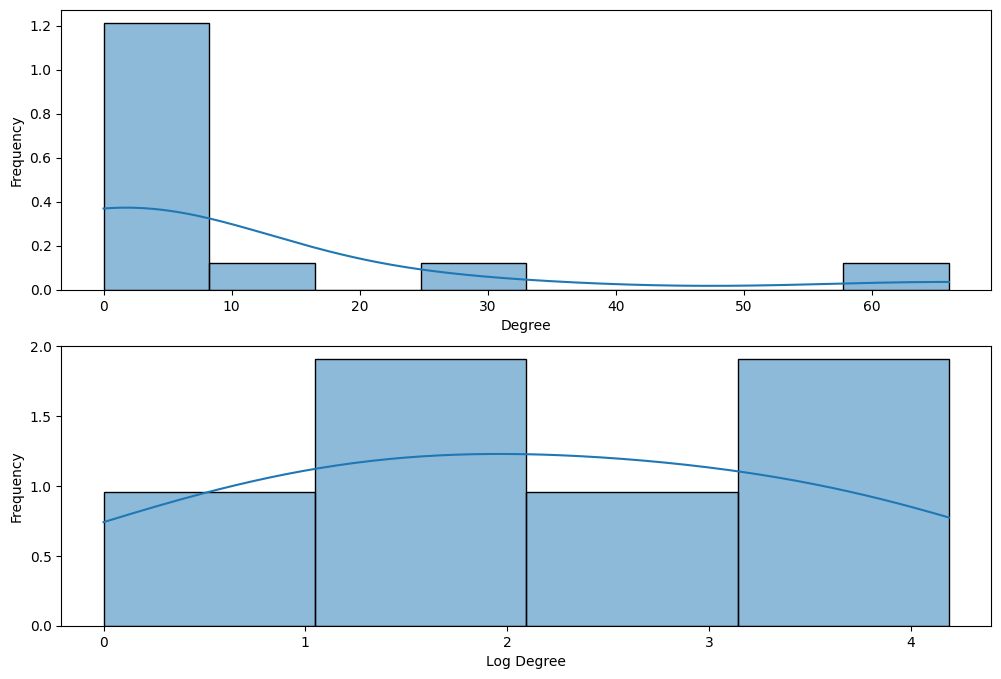

In [ ]:
import seaborn as sns
degree_freq = np.array(nx.degree_histogram(G)).astype('float')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plt.rcParams.update({'font.size': 12})

ax1 = sns.histplot(degree_freq, stat='frequency', kde=True, ax=ax1)
ax2 = sns.histplot(np.log(degree_freq), stat='frequency', kde=True, ax=ax2)
ax1.set(ylabel="Frequency", xlabel="Degree")
ax2.set(ylabel="Frequency", xlabel="Log Degree")
plt.show()

In [ ]:
import pandas as pd


# Helper function to convert a sorted list of (team, value) tuples
 # into a DataFrame with columns ['Team', centrality_name]
def createBarChartForCentralityMeasures(sorted_centrality_teams, centrality_name):
    # sorted_centrality_teams: list of tuples -> [(team_name, centrality_value), ...]
    # centrality_name: name of the centrality metric to use as column header
    df = pd.DataFrame(sorted_centrality_teams, columns=['Team', centrality_name])
    return df


# Main DataFrame that will hold all centrality measures for each team
metric_main_df = pd.DataFrame(index=list(G.nodes()))


# Compute different centrality measures for the graph and convert each
 # to a DataFrame using the helper function above
degree_centrality_df = createBarChartForCentralityMeasures(
    sorted(nx.degree_centrality(G).items(), key=lambda x: x[1], reverse=True),
    'Degree Centrality'
)
closeness_centrality_df = createBarChartForCentralityMeasures(
    sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1], reverse=True),
    'Closeness Centrality'
)
betweenness_centrality_df = createBarChartForCentralityMeasures(
    sorted(nx.betweenness_centrality(G).items(), key=lambda x: x[1], reverse=True),
    'Betweenness Centrality'
)
eigenvector_centrality_df = createBarChartForCentralityMeasures(
    sorted(nx.eigenvector_centrality(G).items(), key=lambda x: x[1], reverse=True),
    'Eigenvector Centrality'
)
pagerank_df = createBarChartForCentralityMeasures(
    sorted(nx.pagerank(G).items(), key=lambda x: x[1], reverse=True),
    'PageRank'
 )


# HITS algorithm returns two dictionaries: hubs and authorities
hub, auth = nx.hits(G)
hubs_df = createBarChartForCentralityMeasures(
    sorted(hub.items(), key=lambda x: x[1], reverse=True),
    'Hubs'
)
authorities_df = createBarChartForCentralityMeasures(
    sorted(auth.items(), key=lambda x: x[1], reverse=True),
    'Authorities'
 )


# Join all centrality metrics into a single DataFrame indexed by team name
for metric in [degree_centrality_df, closeness_centrality_df, betweenness_centrality_df,
               eigenvector_centrality_df, pagerank_df, hubs_df, authorities_df]:
    metric = metric.set_index('Team')  # use team names as index
    metric_main_df = metric_main_df.join(metric)  # align by index and merge columns


# Display the combined centrality DataFrame
metric_main_df

,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality,PageRank,Hubs,Authorities
BrighamYoung,0.105263,0.423792,0.032490,0.106503,0.009588,0.010092,0.010092
FloridaState,0.105263,0.413043,0.017621,0.096385,0.009641,0.009132,0.009132
Iowa,0.105263,0.407143,0.013122,0.116262,0.009509,0.011017,0.011017
KansasState,0.105263,0.420664,0.023070,0.106250,0.009617,0.010069,0.010069
NewMexico,0.096491,0.402827,0.010664,0.101190,0.008887,0.009589,0.009589
...,...,...,...,...,...,...,...
TexasChristian,0.096491,0.413043,0.014370,0.114943,0.008777,0.010893,0.010893
California,0.096491,0.382550,0.007516,0.111198,0.008809,0.010538,0.010538
AlabamaBirmingham,0.087719,0.395833,0.011582,0.073015,0.008369,0.006918,0.006918
Arkansas,0.087719,0.377483,0.006498,0.070452,0.008369,0.006675,0.006675



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


C:\Users\Haroon\AppData\Local\Temp\ipykernel_17848\1618745125.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


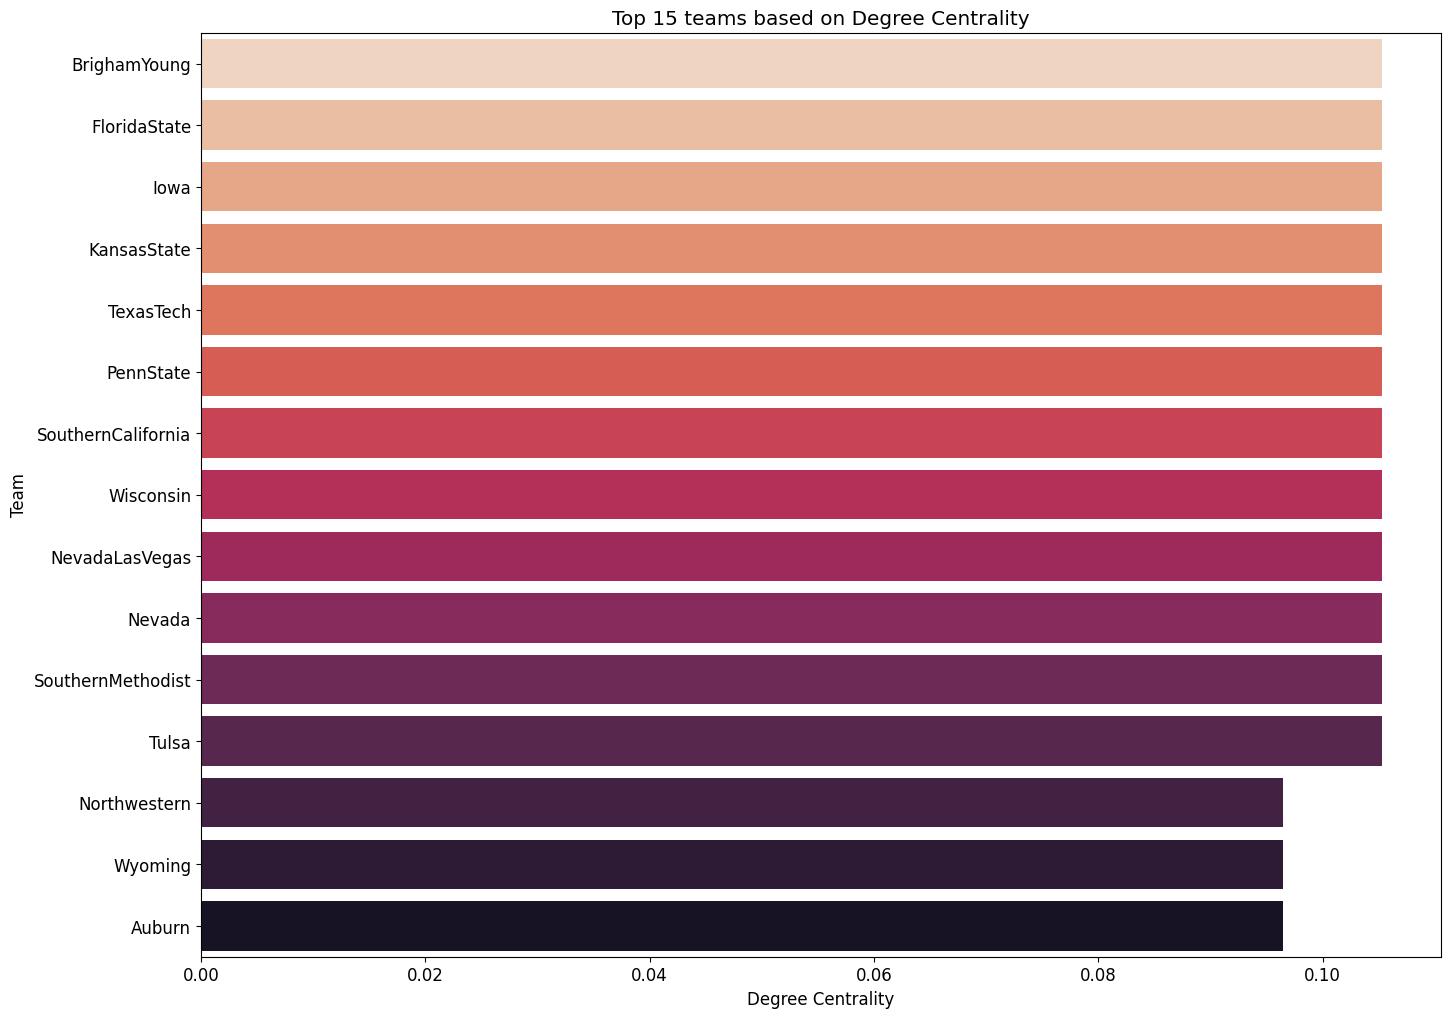

alt.LayerChart(...)

In [10]:
# ensure nx_altair / altair are available (install if necessary)
%pip install -q nx_altair altair
import altair as alt
import nx_altair as nxa

# build a degree dictionary (previously 'd' was an int from an earlier loop)
d = dict(G.degree())

for n in G.nodes():
    G.nodes[n]['name'] = n
    G.nodes[n]['degree'] = d[n]
    # use .loc since metric_main_df is indexed by team name
    G.nodes[n]['degree_centrality'] = metric_main_df.loc[n, 'Degree Centrality']
    G.nodes[n]['closeness_centrality'] = metric_main_df.loc[n, 'Closeness Centrality']
    G.nodes[n]['betweenness_centrality'] = metric_main_df.loc[n, 'Betweenness Centrality']
    G.nodes[n]['eigenvector_centrality'] = metric_main_df.loc[n, 'Eigenvector Centrality']
    G.nodes[n]['pagerank'] = metric_main_df.loc[n, 'PageRank']
    G.nodes[n]['hubs'] = metric_main_df.loc[n, 'Hubs']
    G.nodes[n]['authorities'] = metric_main_df.loc[n, 'Authorities']
    
    
pos = nx.kamada_kawai_layout(G)

edges_layer = nxa.draw_networkx_edges(G, pos=pos)  # get the edge layer
nodes_layer = nxa.draw_networkx_nodes(G, pos=pos)  # get the node layer

fig, ax = plt.subplots(figsize=(16, 12))
ax = sns.barplot(
    x='Degree Centrality',
    y='Team',
    data=metric_main_df.sort_values(by='Degree Centrality', ascending=False)['Degree Centrality']
         .reset_index()
         .rename(columns={'index': 'Team'})[:15],
    palette='rocket_r'
)
ax.set(title="Top 15 teams based on Degree Centrality")
plt.show()

nodes_layer = nodes_layer.mark_circle().encode(
        color=alt.Color('degree_centrality:Q', scale=alt.Scale(scheme='inferno')), 
        size=alt.Size('degree_centrality:Q', scale=alt.Scale(range=[10,500])),
        tooltip=[alt.Tooltip('name:N'), alt.Tooltip('degree:Q')]
        ).interactive()
edges_layer = edges_layer.mark_line().encode()

(edges_layer + nodes_layer).properties(width=1200, height=800, title='Football Network by Degree Centrality')

In [ ]:
++++}++++++++++